# Trabajo Práctico 1

## Instalación de dependencias

In [36]:
%pip install numpy
%pip install opencv-python
%pip install matplotlib
%pip install pyqt6

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Imports

In [37]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Desarrollo del Trabajo Práctico

### Parte 1

#### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [38]:
def obtener_coordenadas_cromaticas(img):
    img = img.astype(np.float32)
    suma_rgb = np.sum(img, axis=2, keepdims=True)
    suma_rgb[suma_rgb == 0] = 1
    coordenadas_cromaticas = img / suma_rgb
    return coordenadas_cromaticas


#### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [39]:
def corregir_mediante_white_patch(img, percentil=95):
    img = img.astype(np.float32)
    valores_maximos = np.max(img, axis=(0, 1))
    valores_percentil = np.percentile(img, percentil, axis=(0, 1))
    valores_maximos = np.where(valores_maximos == 255, valores_percentil, valores_maximos)
    factor_correccion = 255 / valores_maximos
    img_corregida = img * factor_correccion
    img_corregida = np.clip(img_corregida, 0, 255).astype(np.uint8)
    return img_corregida


#### 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

##### Resultados: Coordenadas cromáticas

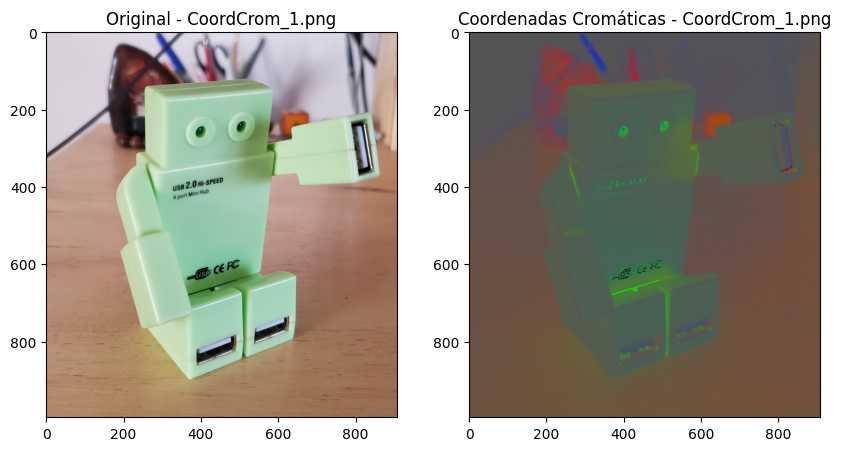

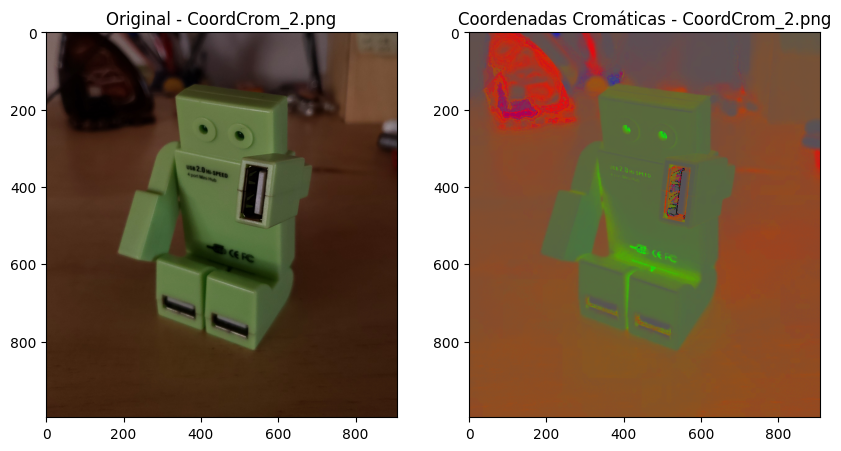

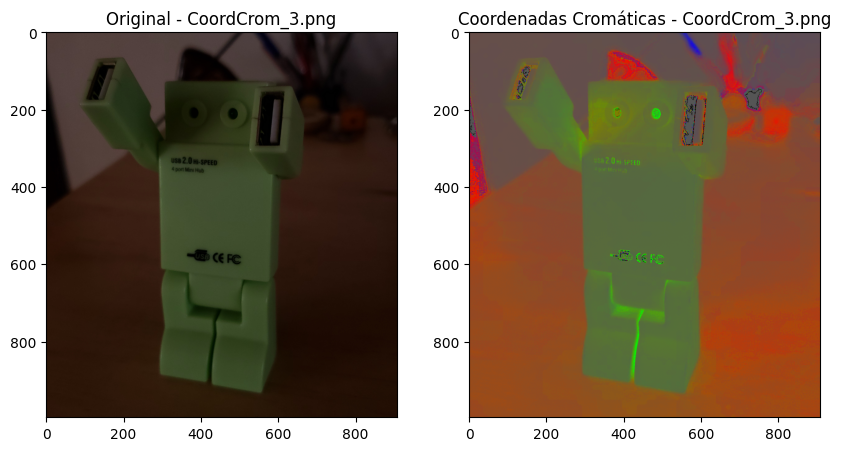

In [40]:
image_files = [
    'img/coord_cromaticas/CoordCrom_1.png',
    'img/coord_cromaticas/CoordCrom_2.png',
    'img/coord_cromaticas/CoordCrom_3.png'
]

for image_file in image_files:
    img = cv.imread(image_file)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    coordenadas_cromaticas = obtener_coordenadas_cromaticas(img)
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f'Original - {image_file.split("/")[-1]}')
    
    plt.subplot(1, 2, 2)
    plt.imshow(coordenadas_cromaticas)
    plt.title(f'Coordenadas Cromáticas - {image_file.split("/")[-1]}')
    
    plt.show()

##### Resultados: White-Patch

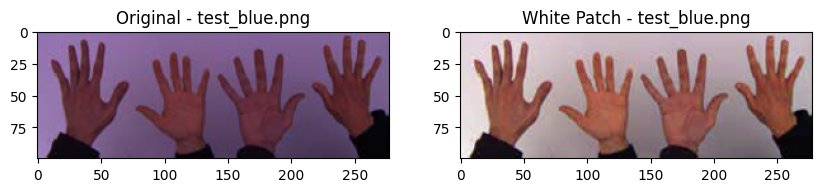

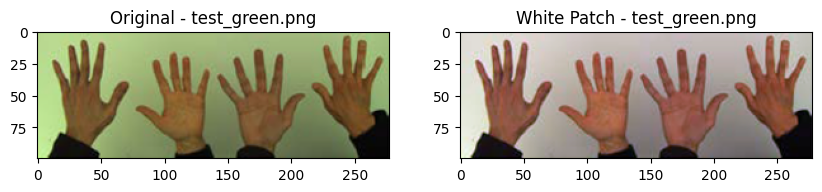

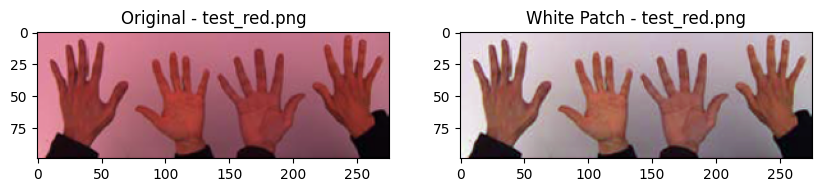

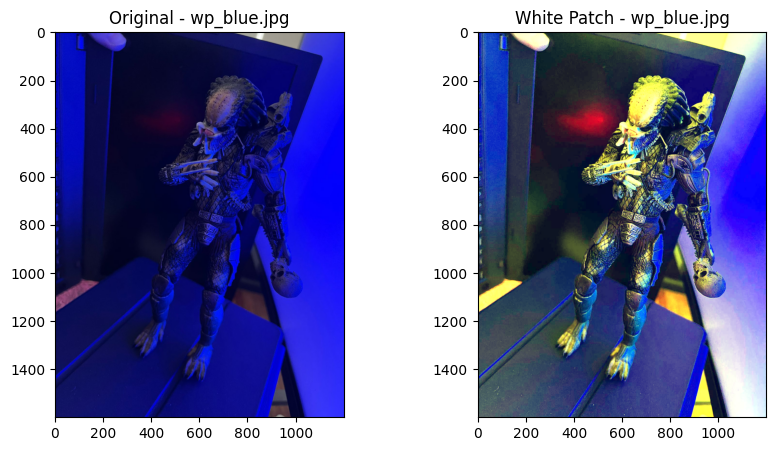

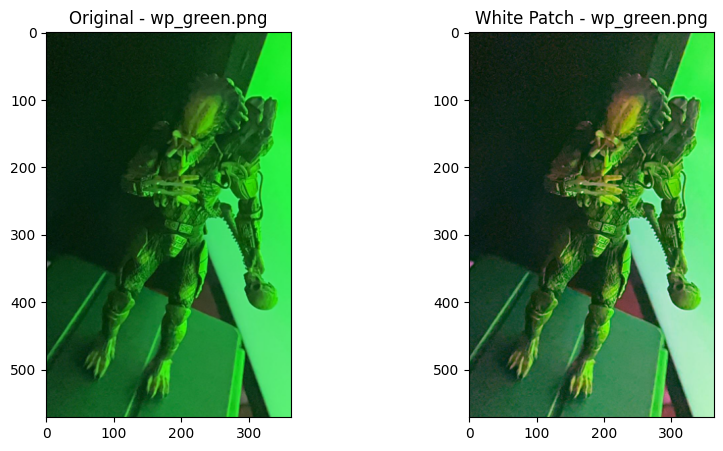

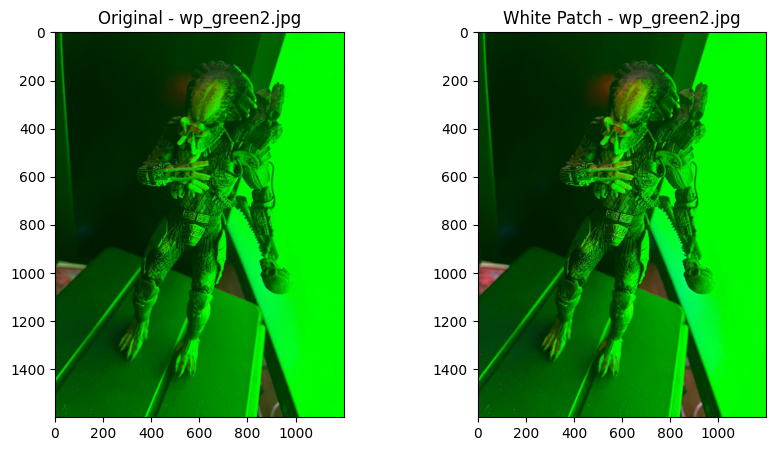

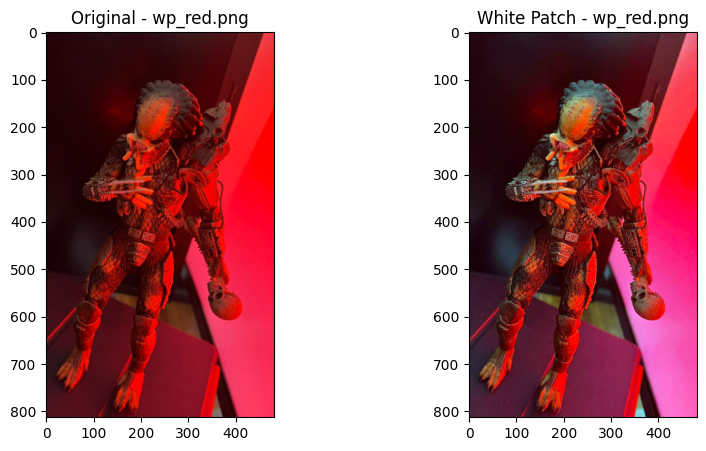

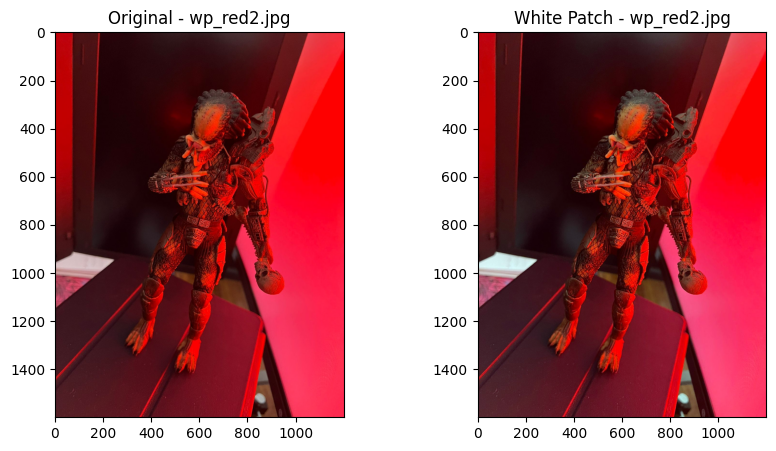

In [41]:
image_files = [
    'img/white_patch/test_blue.png',
    'img/white_patch/test_green.png',
    'img/white_patch/test_red.png',
    'img/white_patch/wp_blue.jpg',
    'img/white_patch/wp_green.png',
    'img/white_patch/wp_green2.jpg',
    'img/white_patch/wp_red.png',
    'img/white_patch/wp_red2.jpg', 
]

for image_file in image_files:
    img = cv.imread(image_file)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    imagen_corregida = corregir_mediante_white_patch(img)
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f'Original - {image_file.split("/")[-1]}')
    
    plt.subplot(1, 2, 2)
    plt.imshow(imagen_corregida)
    plt.title(f'White Patch - {image_file.split("/")[-1]}')
    
    plt.show()

### Parte 2

#### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

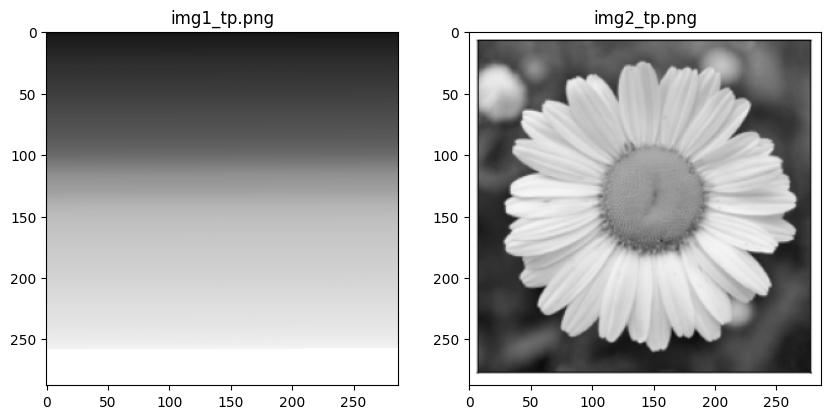

In [ ]:
img1 = cv.imread('img/img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img/img2_tp.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255) 
plt.title('img1_tp.png')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title('img2_tp.png')

plt.show()

#### 2. Elija el número de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

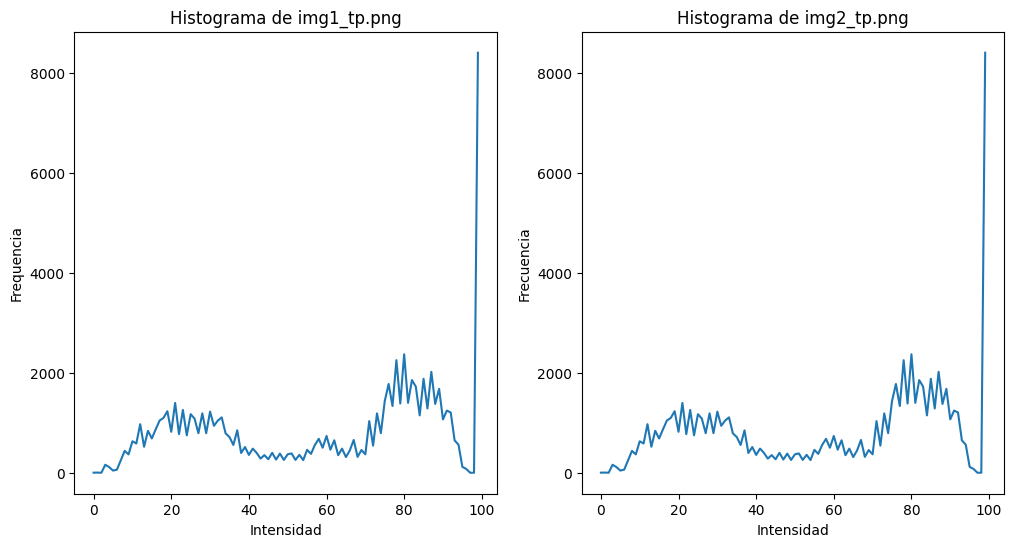

Score: 1.0


In [43]:
histograma_img1 = cv.calcHist([img1], [0], None, [100], [0, 256])
histograma_img2 = cv.calcHist([img2], [0], None, [100], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_img1)
plt.title('Histograma de img1_tp.png')
plt.xlabel('Intensidad')
plt.ylabel('Frequencia')

plt.subplot(1, 2, 2)
plt.plot(histograma_img2)
plt.title('Histograma de img2_tp.png')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.show()

score = cv.compareHist(histograma_img1, histograma_img2, cv.HISTCMP_CORREL)
print(f'Score: {score}')

Como puede observarse en los gráficos de los histogramas y en el resultado de la comparación realizada con OpenCV, ambos histogramas son idénticos. Esto implica que la distribución de valores de intensidades de píxeles es la misma para ambas imágenes. Sin embargo, al analizar las imágenes originales, se constató que no solo no eran iguales, sino que existía una diferencia significativa en lo que mostraban (una flor vs. una escala en degradé de grises). Esto nos permite concluir que un histograma no resulta particularmente útil para entrenar un modelo de clasificación o detección de imágenes, ya que no aporta información sobre el contenido visual real. Esto se debe a que los histogramas ignoran completamente las características espaciales presentes en las muestras.